# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}((aX)^2 + Y^2 - 2aXY) = a^2\mathbb{E}(X^2) + \mathbb{E}(Y^2) - 2a\mathbb{E}(X^2 + X\epsilon_i) = a^2(\mathbb{E}(X)^2 + Var(X)) + \mathbb{E}(Y)^2 + Var(Y) - 2a(\mathbb{E}(X)^2 + Var(X) + \mathbb{E}(X)\mathbb{E}(\epsilon_i)) = a^2 + Var(X + \epsilon_i) - 2a = a^2 + \sigma^2 + 1 - 2a = (a-1)^2 + \sigma^2$

As we can see argmin of $R(a, a^*)$ does not depend on $\sigma^2$ since it is always $a^* = 1$ to minimize $(a-1)^2$.
In our task we know $a^* = 1$.

In [1]:
sigma_eps = 1
def population_risk(a):
    return (a - 1)**2 + sigma_eps

### b)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# sampling
n = 50
var = 1
eps = np.random.normal(0, var, n)
X = np.random.normal(0, 1, n)

In [14]:
Y = X + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [15]:
def empirical_risk(a, X, Y):
    n = len(X)
    return (1 / n) * np.sum((a * X - Y)**2)

### c)

In [16]:
from scipy.optimize import minimize

In [17]:
min_emp = minimize(lambda a: empirical_risk(a, X, Y), 0)
min_emp_x = min_emp["x"][0]
min_emp_y = min_emp["fun"]

In [18]:
min_pop = minimize(population_risk, [1])
min_pop_x = min_pop["x"][0]
min_pop_y = min_pop["fun"]

In [19]:
a_list = np.expand_dims(np.linspace(-2.0, 3.5, 100), 1)

In [20]:
emp_risk = np.apply_along_axis(empirical_risk, 1, a_list, X, Y)
pop_risk = np.apply_along_axis(population_risk, 1, a_list)

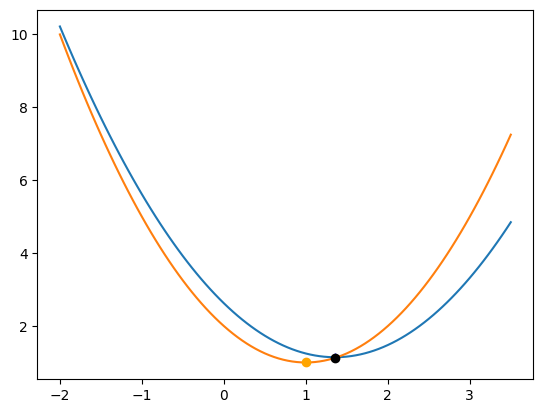

In [21]:
plt.plot(a_list, emp_risk)
plt.plot(a_list, pop_risk)
plt.plot(min_emp_x, min_emp_y, color="blue", marker="+")
plt.plot(min_pop_x, min_pop_y, color="orange", marker="o")
plt.plot(min_emp_x, population_risk(min_emp_x), color="black", marker="o")
plt.show()

ERM estimator is the black point on the plot

### d)

In [25]:
def experiment(n, L):
  excess = 0
  for i in range(L):
    var = 1
    eps = np.random.normal(0, var, n)
    X = np.random.normal(0, 1, n)
    Y = X + eps
    min_emp = population_risk(minimize(lambda a: empirical_risk(a, X, Y), 0)["x"][0])
    min_pop = minimize(population_risk, 0)["fun"]
    excess += min_emp - min_pop
  return excess / L

In [26]:
n_list = [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900]
means = []
for n in n_list:
  means.append(experiment(n, 200))

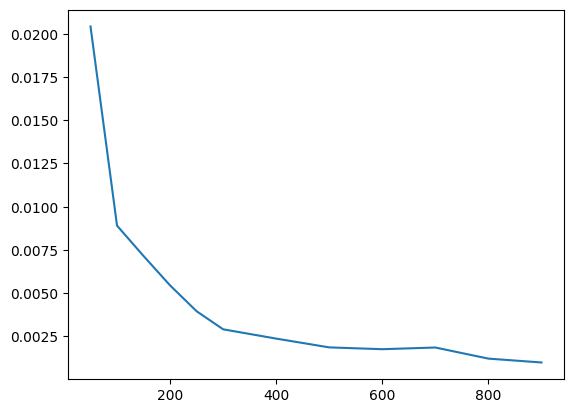

In [27]:
plt.plot(n_list, means)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$